### Import libaries

In [2]:
import gc
import sys
import os 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [5]:
from carPrice import treeCarPrice
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data 

In [6]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")

### garbage collect

In [7]:
gc.collect()
%reset -f out

Flushing output cache (0 entries)


----
### Decision tree classifer 

* base model 

In [8]:
base_model = DecisionTreeRegressor(random_state=2020)

In [10]:
car_price_decision = treeCarPrice(data,base_model)

In [11]:
X_train,X_test,y_train,y_test = car_price_decision.data_split(1988,0.1)

In [12]:
car_price_decision.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.956682,2048.664453,488.333333
test,0.967420,1818.709325,424.830769


### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [13]:
params = {
    "max_features":[0.8,"sqrt","log2","auto"]
}

In [14]:
car_price_decision.paramSearch(params,X_train,y_train,V=0)

In [12]:
car_price_decision.gridResult.best_params_

{'max_features': 'auto'}

In [15]:
car_price_decision.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.956682,2048.664453,488.333333
test,0.967420,1818.709325,424.830769


### Let's look at feature importance

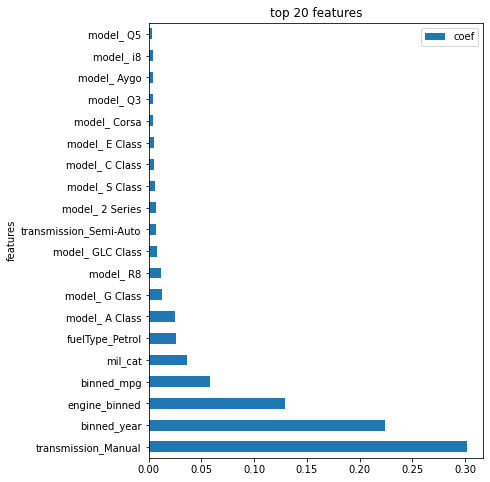

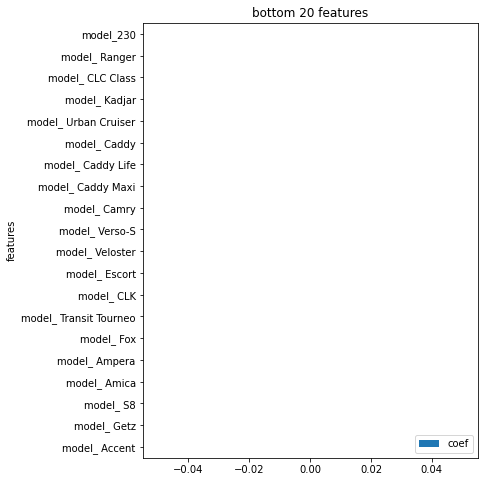

In [17]:
feature_table = car_price_decision.linear_feature_importance()

### feature importance ranking is quite different from linear regression model.

### Looking at cases big price difference and small price difference

In [18]:
price_table_decision = car_price_decision.price_diff()

In [19]:
price_table_decision.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,900.769823,900.769823
11984,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,900.769823,900.769823
39540,1,5,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,900.000000,900.000000
43781,1,2,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,769.565217,769.565217
85021,1,5,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,652.288401,652.288401
71571,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,551.629073,551.629073
82292,2,3,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,520.367340,520.367340
44539,1,4,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,505.858586,505.858586
77582,1,4,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,482.916667,482.916667
82461,2,2,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,476.396046,476.396046


In [20]:
price_table_decision.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
36308,4,0,4,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
54906,1,3,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
54905,2,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
90114,2,3,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
28039,3,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.0,0.0
90120,3,2,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.0,0.0
36307,4,0,4,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.0,0.0
71445,2,2,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
71448,2,3,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0.0
80241,4,1,3,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0.0,0.0


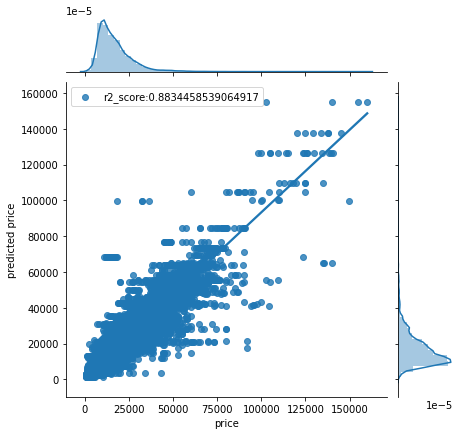

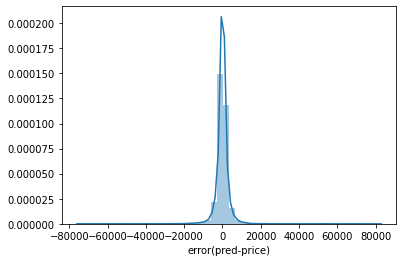

In [21]:
car_price_decision.plot_pred_price()

### Let's see if an ensemble method would improve the outcome

In [22]:
base_forest = RandomForestRegressor(random_state=2020)

In [23]:
car_price_forest = treeCarPrice(data,base_forest)

In [24]:
car_price_forest.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.955028,2087.413364,484.591918
test,0.957155,2085.630334,360.012597


### Slightly better than decision tree in terms of R2

#### Let's tune with gridsearch

#### Key parameters:

* n_estimators: default 100 
* max_features: default auto (all feautres) sqrt, log2 
* max_samples: if boostrap is true, num of samples draw from X to train , default =None, all samples


In [25]:
params_forest = {
    "n_estimators":[100,200,300],
    "max_samples":[None,0.8]   
}

In [26]:
car_price_forest.paramSearch(params_forest,X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done  18 out of  30 | elapsed:  4.5min remaining:  3.0min
[Parallel(n_jobs=22)]: Done  30 out of  30 | elapsed:  5.3min finished


In [27]:
car_price_forest.gridResult.best_params_

{'max_samples': None, 'n_estimators': 200}

In [28]:
car_price_forest.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.955130,2085.046634,470.269011
test,0.957903,2067.347361,335.694503


<!-- ### plot trees -->

### Slightly better with more trees. 

### Let's look at feature importances

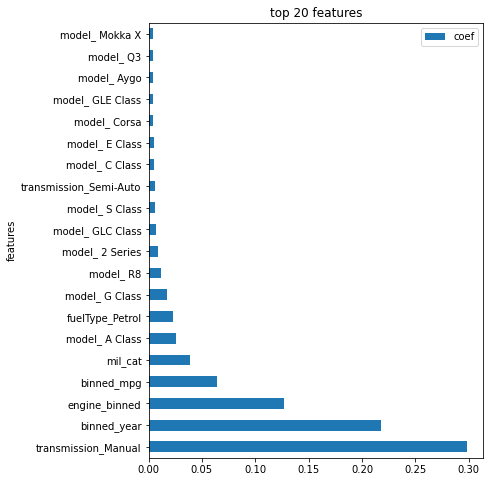

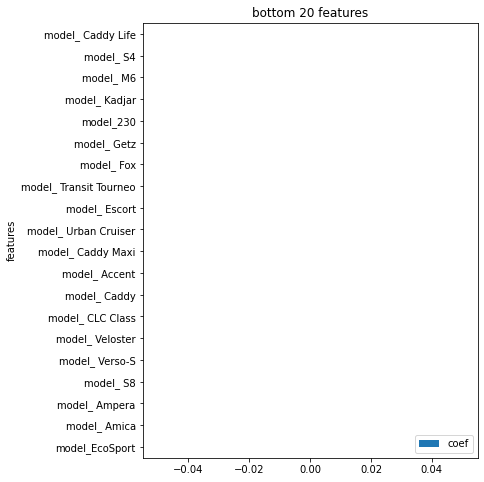

In [29]:
feature_table = car_price_forest.linear_feature_importance()

In [30]:
price_table_forest = car_price_forest.price_diff()

In [31]:
price_table_forest.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1014.959517,1014.959517
39540,1,5,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,603.883968,603.883968
11984,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,563.650249,563.650249
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,547.296638,547.296638
43781,1,2,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,531.229487,531.229487
77582,1,4,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,519.689861,519.689861
44539,1,4,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,450.254892,450.254892
87481,0,4,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,427.165417,427.165417
82292,2,3,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,415.005323,415.005323
54900,1,4,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,394.160043,394.160043


In [32]:
price_table_forest.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
76282,3,2,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.002714,0.002714
15523,3,3,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.002675,0.002675
15474,3,3,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.002675,0.002675
22191,4,2,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.002609,0.002609
91250,4,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.002588,0.002588
51792,3,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.002037,0.002037
87059,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.002005,0.002005
89800,3,2,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.002003,0.002003
84330,4,0,2,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0.001474,0.001474
98959,3,2,3,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.001282,0.001282


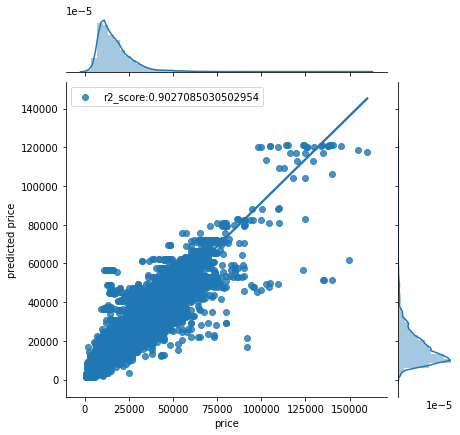

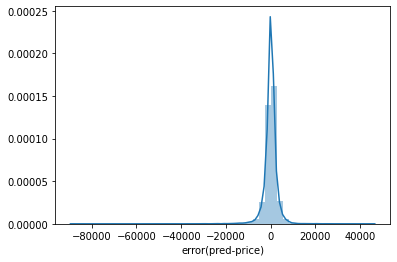

In [33]:
car_price_forest.plot_pred_price()

#### Tend to over predict price on old car with high milage. 

### Top features are similar among tree and random forest. Bottom features are relatively similar as well

### Let's look at how xgboost work:

In [35]:
xg_model = XGBRegressor(objective="reg:squarederror",seed=2020)
car_price_xg = treeCarPrice(data,xg_model)

In [36]:
car_price_xg.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.930023,2603.839290,802.624177
test,0.935147,2565.962836,422.347992


### GridSearchTuning

### Key parameters:
* learning_rate
* n_estimators
* subsample
* colsample_bytree

In [37]:
params = {
    "learning_rate":[0.25,0.5],
    "n_estimators":[150,200,250],
    "subsample":[0.9,0.8,0.7],
    "colsample_bytree":[1.0,0.9]
}

In [38]:
car_price_xg.paramSearch(params,X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=22)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=22)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=22)]: Done 180 out of 180 | elapsed: 17.3min finished


In [39]:
car_price_xg.gridResult.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.5,
 'n_estimators': 250,
 'subsample': 0.9}

In [40]:
car_price_xg.regression_metrics(X_train,y_train,X_test,y_test)

,r2_score,rmse,price_diff_abs_max
train,0.949034,2222.163814,696.000602
test,0.958354,2056.240200,468.230589


### xgboost slightly outperforms random forest and decision tree. 

### Look at the features

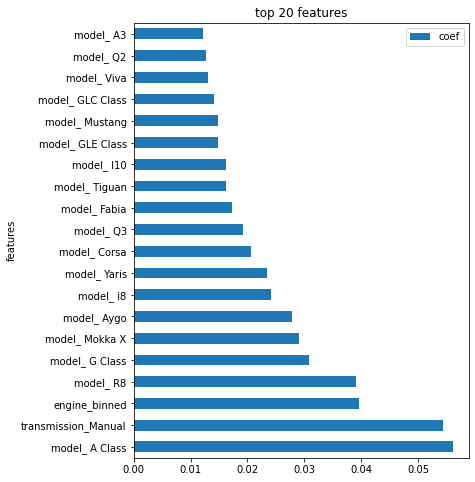

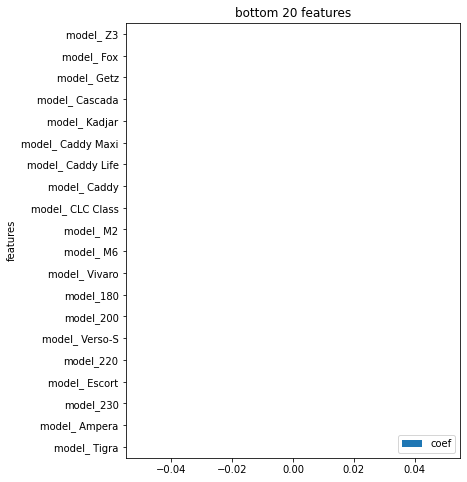

In [41]:
feature_table_xg = car_price_xg.linear_feature_importance()

### Let's see if we can remove bottom features to improve the performance

In [42]:
car_price_xg.removeFeatures(20)

In [43]:
X_train_trimmed,X_test_trimmed,y_train_trimmed,y_test_trimmed = car_price_xg.data_split(1988,0.1,trimmed=True)

In [44]:
car_price_xg.regression_metrics(X_train_trimmed,y_train_trimmed,X_test_trimmed,y_test_trimmed)

,r2_score,rmse,price_diff_abs_max
train,0.949178,2219.030469,482.249023
test,0.958354,2056.240200,468.230589


### Same metrics but with less features 
___

### Look at returns with big and small deta

In [45]:
price_diff_xg = car_price_xg.price_diff(trimmed=True)

In [46]:
price_diff_xg.head(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
39711,1,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1571.293766,1571.293766
39336,1,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1558.790445,1558.790445
20061,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1252.019388,1252.019388
71819,1,0,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1033.538945,1033.538945
39540,1,5,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,810.280388,810.280388
77582,1,4,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,766.358480,766.358480
11984,1,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,731.660021,731.660021
40019,1,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,623.589232,623.589232
82292,2,3,4,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,571.667363,571.667363
71571,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,555.487106,555.487106


In [47]:
price_diff_xg.tail(25)

,binned_year,mil_cat,binned_mpg,engine_binned,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_EcoSport,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,price_diff_pct,price_diff_abs
21663,4,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.004709,0.004709
32466,4,2,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.004462,0.004462
71720,3,3,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,-0.004204,0.004204
17249,4,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,-0.004204,0.004204
6944,4,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.003908,0.003908
76401,4,1,4,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.003829,0.003829
88376,3,3,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.003585,0.003585
41454,4,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.003538,0.003538
41429,4,0,3,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,-0.003538,0.003538
76035,4,1,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0.003511,0.003511


### Most of these cars are older cars.
___

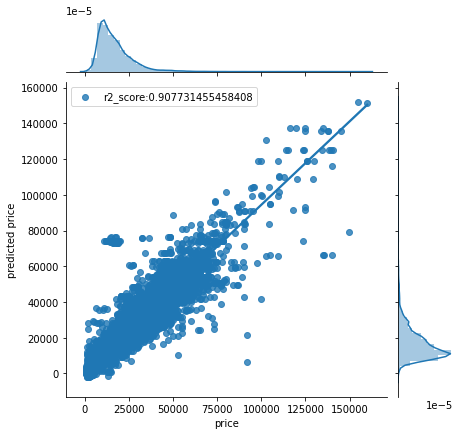

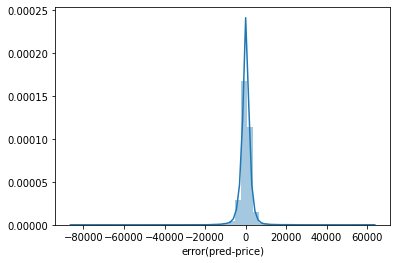

In [48]:
car_price_xg.plot_pred_price(trimmed=True)

### All three tree regressor models tend to have issues with older car especially if the car has lower mileage. 
___